In [2]:
%matplotlib inline
#sci py libraries
import numpy as np
import scipy as sp
import scipy.linalg as la
#abstract graphs libraries
import networkx as nx
import random
#ploting and drawing libraries:
from nxpd import draw
import scipy.integrate as sint
import matplotlib.pyplot as plt

# Grafos eulerianos y hamiltonianos

## Caminos y circuitos eulerianos

### Definiciones

Llamamos camino euleriano a cualquier camino que recorra una vez todas las aristas de un grafo. Si el vertice de origen es el mismo que el vertice donde acabo será un circuito euleriano. 

### Como sabemos si el grafo es euleriano
Vamos a empezar pensando en un camino euleriano cualquiera, empezamos en el vertice origen y vamos recorriendo todas las aristas hasta llegar al final. ¿Cuales serán los grados de los distintos vértices? Para cualquier vértice intermedio tendremos que tener grado par ya que si entramos por una arista deberemos de salir por otra distinta. Para los vertices origen y final el grado será impar pues podemos entrar volviendo a salir como si fuera un vertice intermedio pero tendrémos también un vertice por el que saldremos.

El mismo razonamiento podemos hacer para un circuito salvo que ahora no tendremos ningún vertice impar ya que el vertice origen y destino son el mismo.

Además sabemos que podemos relacionar la suma de los grados de la siguiente manera con el número de aristas:

\begin{equation} E = \frac{d_1 + d_2 + d_3 + ... + d_n}{2} \end{equation}

donde $E$ es el numero de aristas y $d_n$ el grado de cada vertice. Vemos que la suma de los grados de todos los vertices debe ser divisible entre dos, esto significa que debe haber un número par de vértices de grado impar para todos los grafos que existen.

Con esta información podemos concluir si un grafo va a tener camino o circuito euleriano en función de número de vértices de grado impar que tenga:

* Si no tiene ningun vertice de grafo impar el grafo tendrá un circuito euleriano.
* Si tiene dos vértices de grado par el grafo tendrá un camino euleriano y sus vertices de origen y destino serán los de grado impar.
* Si tiene un número par mayor de dos de vértices de grado impar el grfao no tendrá caminos ni circuitos eulerianos.
* Si el grafo tiene un número impar de vertices de grado impar se debe llamar a la policía pues no existe tal cosa.

### Algoritmo para la obtención del camino o circuito euleriano

Ya sabemos determinar cuando un grafo va a tener un camino o circuito euleriano, ahora tenemos que encontrar la forma de obtener el camino en cuestión. Para ello vamos a definir lo que vamos a llamar puente. Un puente va a ser cualquier aristas tal que si la eliminaramos el grafo dejaría de ser conexo. 

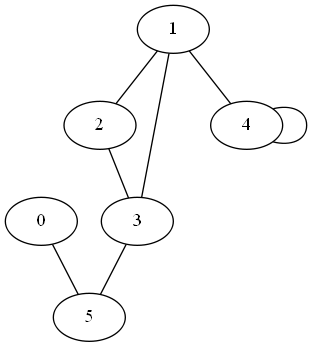

In [18]:
Adj1 = np.array([[0, 0, 0, 0, 0, 1], 
                [0, 0, 1, 1, 1, 0], 
                [0, 1, 0, 1, 0, 0], 
                [0, 1, 1, 0, 0, 1], 
                [0, 1, 0, 0, 1, 0],
                [1, 0, 0, 1, 0, 0]])

G1 = nx.from_numpy_matrix(Adj1)

draw(G1, show='ipynb')

En este ejemplo de grafo tenemos 3 puentes. La aristas $e_{0,5}$, $e_{5,3}$ y $e_{1,4}$ son puentes ya que al quitarlas el grafo no sería conexo. Los bucles por tanto nunca van a ser puentes y las aristas $e_{1,2}$, $e_{2,3}$ y $e_{1,3}$ ya que aunque quitemos alguna de estas vamos a seguir teniendo acceso a todos los vértices.

Ahora ya estamos en una situación en la que podemos plantear el algoritmo.

1. Comprobamos el número de vértices de grado impar.
 * Si hay más de dos vértices de grado impar terminamos ya que no va a ser euleriano.
 * Si hay dos vértices de grado impar usamos el uno de los dos como origen para nuestro algoritmo.
 * Si no hay ningún Vértice de grado impar usamos cualquier vértice como origen.
2. Comprobamos las aristas que conectan el vértice en el que nos encontremos.
 * Si solo hay una arista vamos al vértice que conecta con ella y la borramos.
 * Si hay más de una arista elegimos cualquiera que no sea puente.
3. Repetimos el paso 2 hasta que no queden aristas.

A continuación presento una implementación de este algoritmo de forma que se pueda insertar una matriz de adyacencia y se muestra automaticamente el camino o ciclo euleriano si lo hay. Para ello definimos una modificación de la función que nos da circuitos eulerianos que Networkx ya contenía usando este algoritmo.

In [74]:
def eulerian_path(G, source=None):
    
    g = G.__class__(G)

    v = source

    while g.size() > 0:
        n = v   
        
        nbrs = sorted([v for u,v in g.edges(n)])
        for v in nbrs:
            g.remove_edge(n,v)
            bridge = not nx.is_connected(g.to_undirected())
            if bridge:
                g.add_edge(n,v)  
            else:
                break  
        if bridge:
            g.remove_edge(n,v)            
            g.remove_node(n)
        yield (n,v)

El camino euleriano es el siguiente:
[(1, 2), (2, 3), (3, 1), (1, 4), (4, 4), (4, 3), (3, 5), (5, 0)]


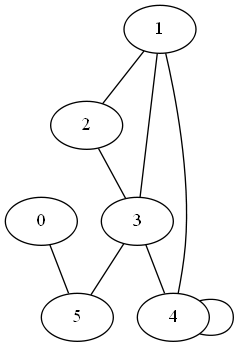

In [78]:
Adj2 = np.array([[0, 0, 0, 0, 0, 1], 
                [0, 0, 1, 1, 1, 0], 
                [0, 1, 0, 1, 0, 0], 
                [0, 1, 1, 0, 1, 1], 
                [0, 1, 0, 1, 1, 0],
                [1, 0, 0, 1, 0, 0]])

G2 = nx.from_numpy_matrix(Adj2)

imp = 0 
i = -1

for nodes in nx.nodes(G2):
    i = i + 1 
    if G2.degree(i) % 2 != 0:
        imp = imp + 1
        ori = nodes
        
if imp > 2:
    print "No hay camino ni circuito euleriano." 
else:
    if imp == 0:
        lista = list(eulerian_path(G2, source=ori))
        print "El circuito euleriano es el siguiente:"
        print lista
    else:
        lista = list(eulerian_path(G2,source=ori))
        print "El camino euleriano es el siguiente:"
        print lista

draw(G2, show='ipynb')

## Caminos y circuitos hamiltonianos

### Definiones

Llamamos camino hamiltoniano a cualquier camino que recorra una vez todos los vértices de un grafo. Si el vértice del que parte es el mismo que en el que acaba lo llamaremos circuito hamiltoniano.

### Como saber si un grafo es hamiltoniano

A diferencia de con los grafos eulerianos no tenemos una manera de saber a ciencia cierta si un grafo va a tener o no un ciclo o un circuito hamiltoniano. Tenemos sin embargo varios teoremas que nos van a determinar si un grafo tiene seguro caminos o circuitos hamiltonianos. Alguno de estos teoremas son:

1. **Teorema de Dirac:**  Si un grafo tiene $n$ vertices para $n>3$, y todos sus vertices tienen grado mayor que $\frac{n}{2}$ entonces ese grafo tendrá un circuito hamiltoniano.

2. **Teorema de Ore:** Tenemos un grafo $G$ de $n$ vértices y dos vértices $u$ y $v$ que pertenecen a $G$ tales que la suma de sus grados es mayor o igual que $n$ y $G+uv$ es el supergrafo de $G$ obtenido añadiendo una arista entre $u$ y $v$. $G$ tendrá un circuito hamiltoniano si y solo si $G+uv$ tiene un circuito hamiltoniano.

3. **Teorema de Bondy y Chatval:** Para cualquier grafo $G$, si $c(G)$ es completo $G$ tendrá un ciclo hamiltoniano.
  * $c(G)$ es el grafo resultante de ir añadiendo aristas entre dos vertices tales que la suma de sus grados sea mayor o igual que su número de vértices hasta que ya no queden más pares de vértices que cumplan esta condición.
  
También hay ciertas cosas que nos pueden ayudar a saber cuando un grafo no va a poder tener un circuito hamiltoniano, por ejemplo, si el grafo tiene algún puente nunca va a poder tener un circuito hamiltoniano pero puede tener un camino.

Vamos a ver distintos ejemplos de grafos para ver si tienen o no circuitos hamiltonianos:


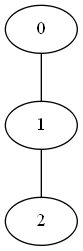

In [87]:
Adj3 = np.array([[0, 1, 0], 
                [1, 0, 1], 
                [0, 1, 0]])


G3 = nx.from_numpy_matrix(Adj3)


draw(G3, show='ipynb')

Este grafo no no va a tener nungún ciclo hamiltoniano ya que tiene dos puentes, vemos que sí tiene una camino hamiltoniano. Como no tiene ningún ciclo hamiltoniano podemos ver que efectivamente los teoremas presentados no nos dicen que vaya a tenerlo. No cumple las condiciones para Dirac ya que tiene dos vértices de grado 1 que es menor que $\frac{3}{2}$. No cumple las condiciones de Ore o Bondy Chatval ya que no hay dos vértices cuyos grados sumen 3 y no estén ya conectados por lo tanto se nos queda igual.

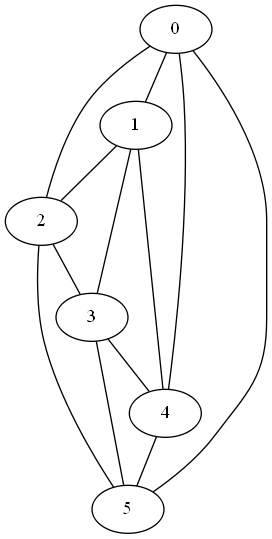

In [94]:
Adj4 = np.array([[0, 1, 1, 0, 1, 1], 
                [1, 0, 1, 1, 1, 0], 
                [1, 1, 0, 1, 0, 1], 
                [0, 1, 1, 0, 1, 1], 
                [1, 1, 0, 1, 0, 1],
                [1, 0, 1, 1, 1, 0]])


G4 = nx.from_numpy_matrix(Adj4)


draw(G4, show='ipynb')

Por el teorema de Dirac vemos rápidamente que este grafo tiene un circuito hamiltoniano ya que todos sus vértices son de grado 4 que es más que la mitad del número de vértices.

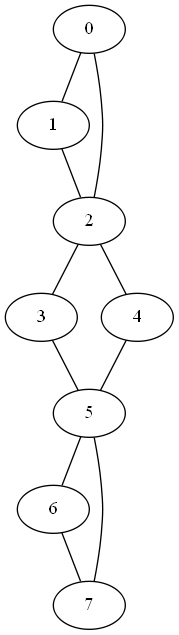

In [95]:
Adj5 = np.array([[0, 1, 1, 0, 0, 0, 0, 0], 
                [1, 0, 1, 0, 0, 0, 0, 0], 
                [1, 1, 0, 1, 1, 0, 0, 0], 
                [0, 0, 1, 0, 0, 1, 0, 0], 
                [0, 0, 1, 0, 0, 1, 0, 0], 
                [0, 0, 0, 1, 1, 0, 1, 1], 
                [0, 0, 0, 0, 0, 1, 0, 1],
                [0, 0, 0, 0, 0, 0, 1, 0]])


G5 = nx.from_numpy_matrix(Adj5)


draw(G5, show='ipynb')

En este caso el teorema de Dirac no nos dice nada ya que hay vértices de grado 2, los unicos dos vértices cuyos grados suman 8 o más son el 2 y el 5, y si añadimos una arsita entre ellos tampoco vemos un circuito hamiltoniano. 

Podemos demostrar que no va a tener un circuito hamiltoniano si pensamos que si existe tal circuito nuestro grafo debería ser isomorfo con el siguiente si le añadimos ciertas aristas.

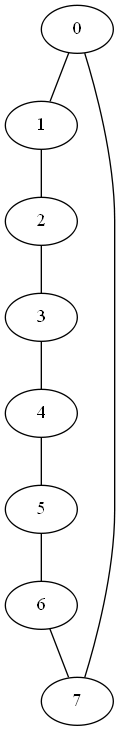

In [96]:
G6 = nx.cycle_graph(8)
draw(G6, show='ipynb')

Tenemos que tener en cuenta que para este segundo grafo los nodos no son necesariamente los mismos que los anteriores, estamos buscando una aplicación para ver cual debería ser cual. Ahora bien, ¿cuales son estas aristas y cuantas son? 

* No pueden ser más de dos ya que el número de aristas ha de ser igual para que sean isomorfos. 
* A parte necesitamso que el camino tenga dos circuitos de longitud tres en aristas y uno de longitud 4 en aristas. 
* Además necesitamos que haya vértices con grados iguales. 

Con estas restricciones es fácil ver que nunca vamos a conseguir un isomorfismo entre esos dos grafos y por tanto podemos concluir que el grafo anterior no va a poder nunca tener un circuito hamiltoniano.